## Thersholding

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

/home/hp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.title("IMAGE")
    plt.axis('off')
    plt.show()

In [211]:
def show_image_comparison(images_with_titles):

    num_images = len(images_with_titles)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5)) 

    if num_images == 1:
        axes = [axes]
    for i, (img, title) in enumerate(images_with_titles):
        ax = axes[i]
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=14)
        ax.axis('off') 

    plt.tight_layout() 
    plt.show()

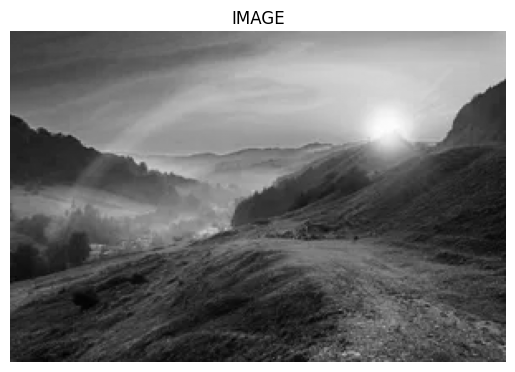

In [9]:
img = cv.imread("nature.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_image(gray)


### Convert an image to grayscale and apply a fixed threshold.

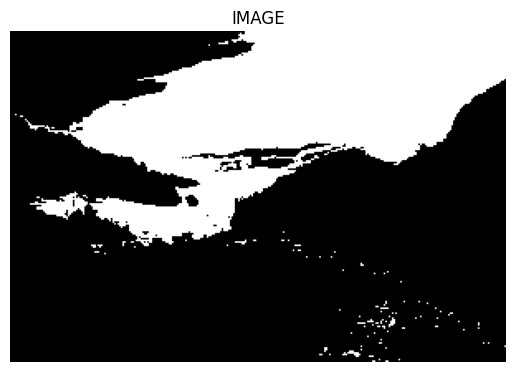

In [213]:
_,thershold_img = cv.threshold(gray,128,255,cv.THRESH_BINARY)
show_image(thershold_img)

### Threshold in different planes - RGB, HSV

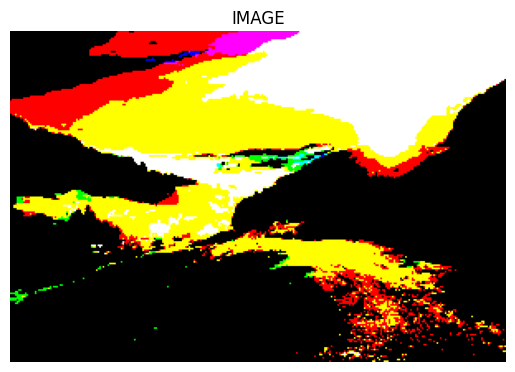

In [13]:
_,thershold_rgb = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
show_image(thershold_rgb)

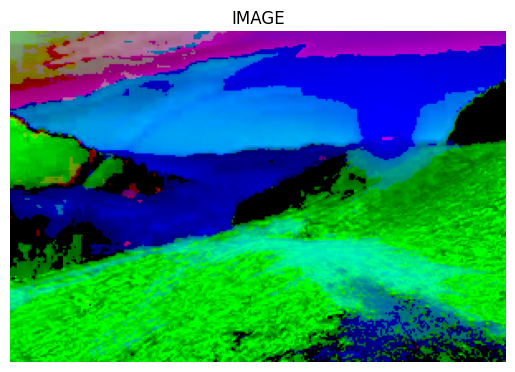

In [99]:
hsv_img = cv.cvtColor(img,cv.COLOR_RGB2HSV)
_,thershold_hsv = cv.threshold(hsv_img, 100, 200, cv.THRESH_TOZERO)
show_image(thershold_hsv)

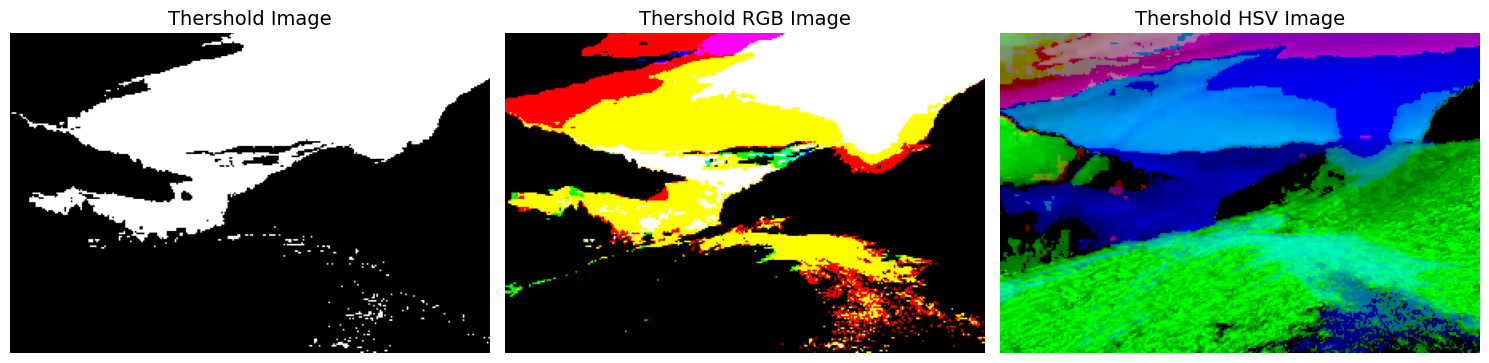

In [212]:
show_image_comparison([(thershold_img,"Thershold Image"),(thershold_rgb,"Thershold RGB Image"),(thershold_hsv,"Thershold HSV Image")])

## Visualize histograms before and after thresholding.

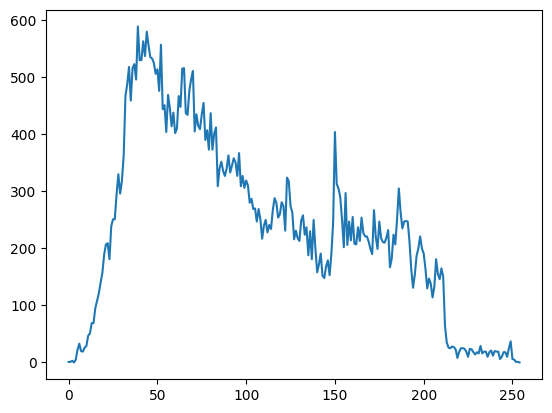

In [17]:
hist = cv.calcHist([gray],[0],None,[255],[0,255])
plt.plot(hist)

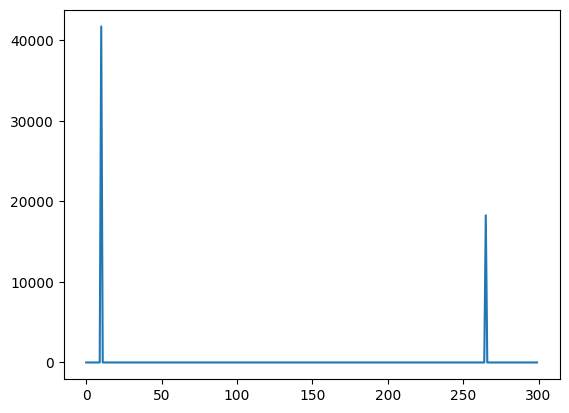

In [226]:
hist_thershold = cv.calcHist([thershold_img],[0],None,[300],[-10,290])
plt.plot(hist_thershold)

#### Comparism of before and after thershold

# AdaptiveThresholding

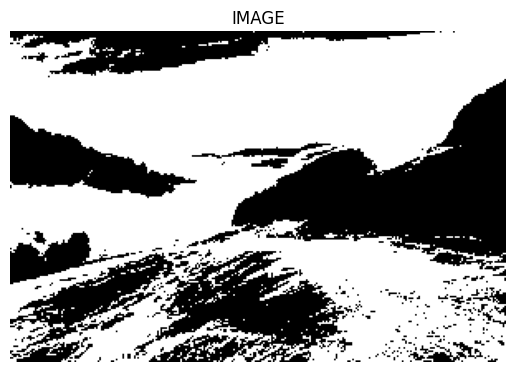

In [234]:
adptive_thershold = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,121,10, None)
show_image(adptive_thershold)

# Ostu Thersholding

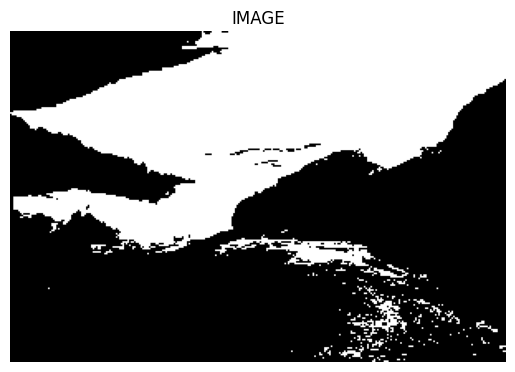

In [232]:
_,ostu_thersholding = cv.threshold(gray,128,255,cv.THRESH_OTSU + cv.THRESH_BINARY)
show_image(ostu_thersholding)

#### Compare Adptive Thersholding and Ostu Thersholding

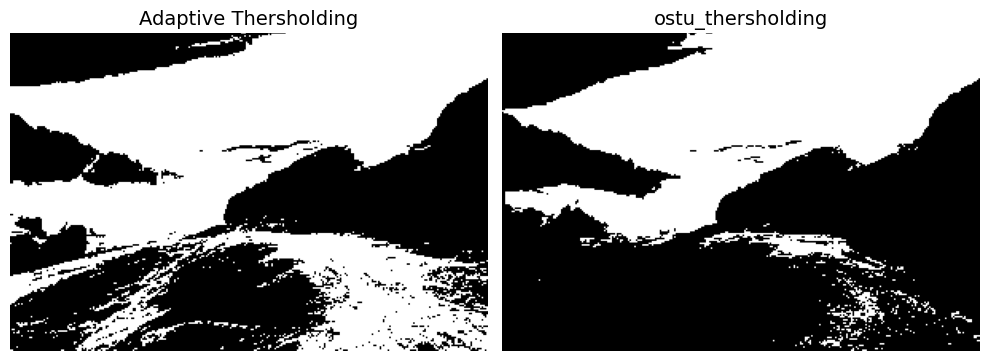

In [228]:
show_image_comparison([(adptive_thershold,"Adaptive Thersholding"),(ostu_thersholding,"ostu_thersholding")])

# Task 1 :  Sobel Edge Detection

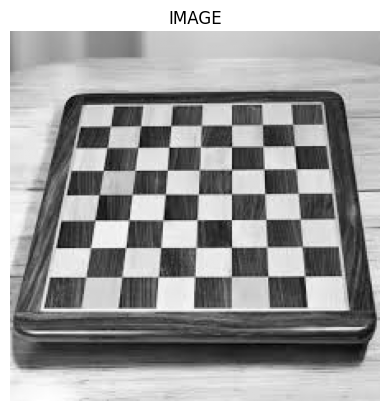

In [35]:
chimg = cv.imread("chessboard.jpg")
chgray = cv.cvtColor(chimg,cv.COLOR_BGR2GRAY)
show_image(chgray)

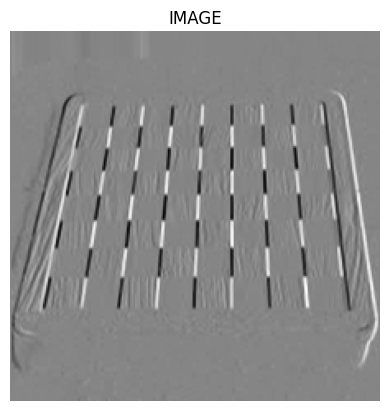

In [61]:
sobelx = cv.Sobel(chgray,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(chgray, cv.CV_64F,0,1,ksize=3)
show_image(sobelx)

In [71]:
sobelx = cv.convertScaleAbs(sobelx,cv.CV_8U)
sobely = cv.convertScaleAbs(sobely,cv.CV_8U)

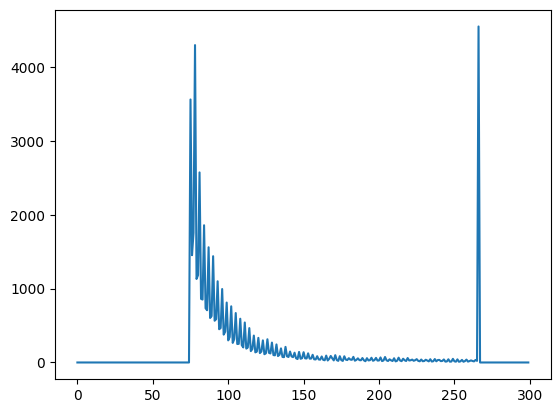

In [238]:
sobelhist = cv.calcHist([sobely],[0],None,[300],[-100,300])
plt.plot(sobelhist)

#### using add weights

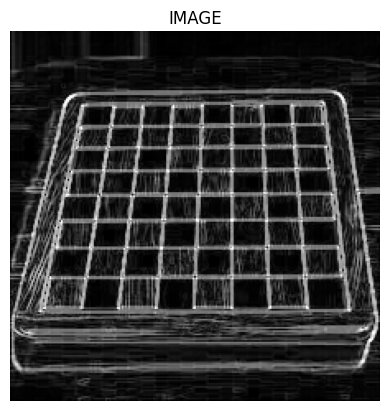

In [77]:
add_magnitude = cv.addWeighted(sobelx,0.5,sobely,0.4,0.9)
show_image(add_magnitude)

##### using formula

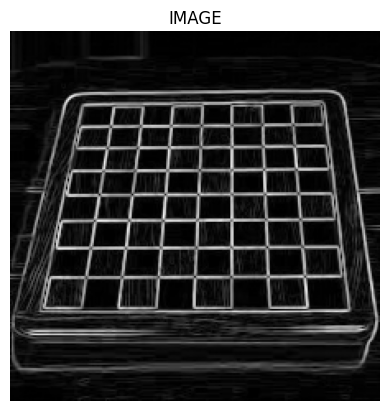

In [66]:
sqrt_magnitude = np.sqrt(np.square(sobelx)+np.square(sobely))
show_image(sqrt_magnitude)


#### using magnitude

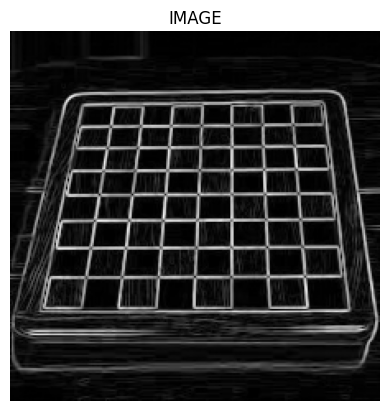

In [65]:
mag_magnitude = cv.magnitude(sobelx,sobely,cv.CV_8U)
show_image(mag_magnitude)

### Try on different images (grayscale and color).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-857.0..908.0].


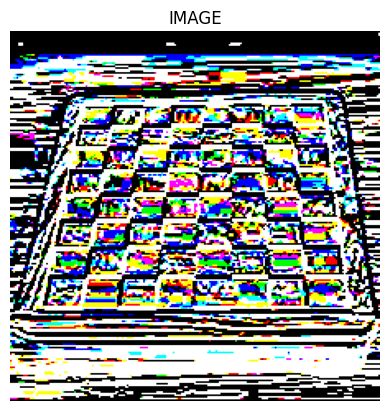

In [96]:
csobelx = cv.Sobel(chimg,cv.CV_32F,1,0,None,3)
csobely = cv.Sobel(chimg,cv.CV_32F,0,1,None,3)
show_image(csobely)

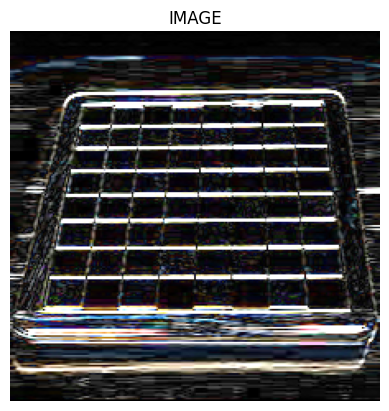

In [92]:
csobelx = cv.convertScaleAbs(csobelx,cv.CV_16U)
csobely = cv.convertScaleAbs(csobely,cv.CV_16U)
show_image(csobely)

In [94]:
csobely.dtype

dtype('uint8')

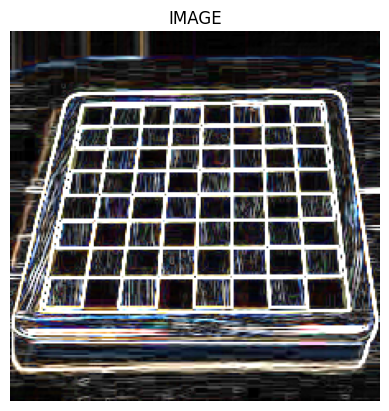

In [98]:
col_magnitude = cv.magnitude(csobelx,csobely,cv.CV_8U)
col_magnitude = cv.convertScaleAbs(col_magnitude,cv.CV_8U)
show_image(col_magnitude)

### Ater use the Gaussian Blur

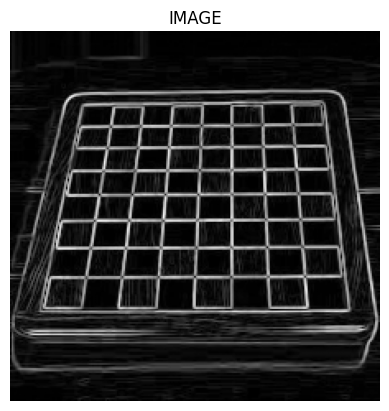

In [ ]:
smooth_chgray = cv.GaussianBlur(chgray,(3,3),0.2)

smooth_sobelx = cv.Sobel(smooth_chgray,cv.CV_64F,1,0,None,3)
smooth_sobely = cv.Sobel(smooth_chgray,cv.CV_64F,0,1,None,3)

smooth_sobelx = cv.GaussianBlur(smooth_sobelx,(3,3),0.2)
smooth_sobely = cv.GaussianBlur(smooth_sobely,(3,3),0.2)

smooth_magnitude = cv.magnitude(smooth_sobelx,smooth_sobely)
smooth_magnitude = cv.convertScaleAbs(smooth_magnitude,cv.CV_8U,0.2)
show_image(smooth_magnitude)

# Task 3 Canny Edge Detection 

In [ ]:
car_img = cv.imread("car.jpg")
car_gray = cv.cvtColor(car_img,cv.COLOR_BGR2GRAY)
show_image(car_gray)

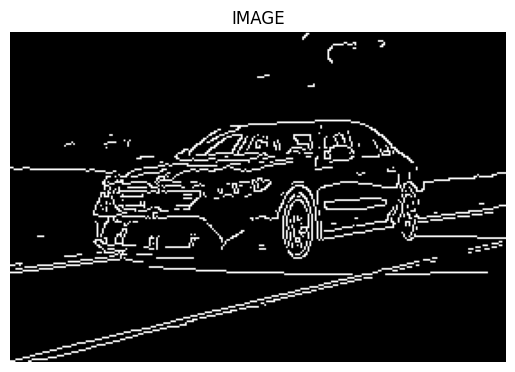

In [126]:
canny = cv.Canny(car_gray,180,200,None,3,True)
show_image(canny)

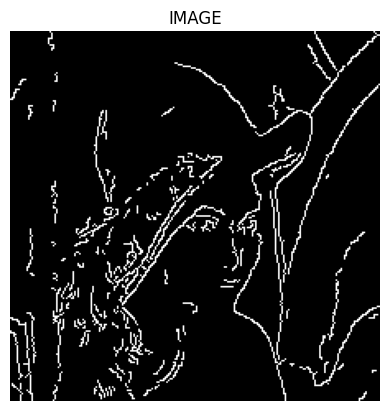

In [151]:
noise_img = cv.imread("noisy.jpg")
noise_img = cv.GaussianBlur(noise_img,(5,5),0.7)
canny_noise = cv.Canny(noise_img,180,250,None,3,False)
show_image(canny_noise)

### Detect the coins and shapes

(244, 206)
(244, 206)


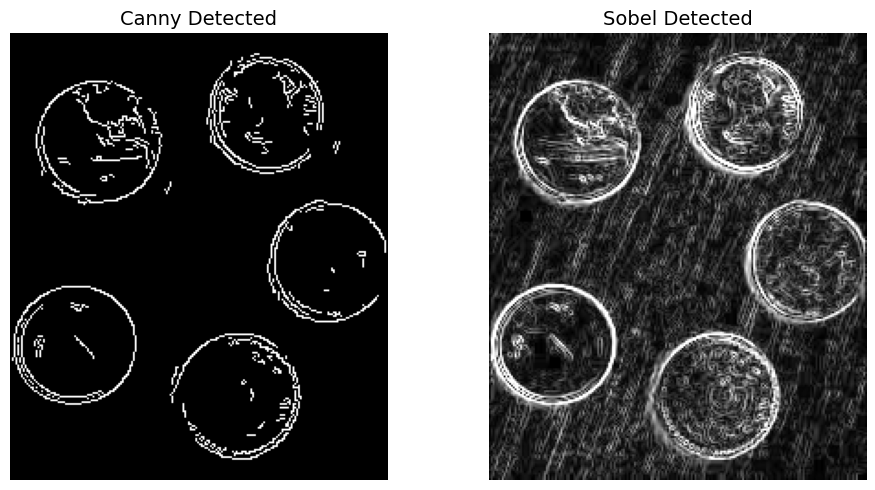

In [239]:
coin = cv.imread("coins.jpg")
coin = cv.cvtColor(coin,cv.COLOR_BGR2GRAY)
coin = cv.GaussianBlur(coin,(3,3),0.2)
print(coin.shape)

coin_det = cv.Canny(coin,130,205,None,3,True)

coin_sx = cv.Sobel(coin,cv.CV_64F,1,0,None,3)
coin_sy = cv.Sobel(coin,cv.CV_64F,0,1,None,3)
print(coin_sx.shape)
coin_mag = cv.convertScaleAbs(cv.magnitude(coin_sx,coin_sy),cv.CV_8U)
_,coin_thershold = cv.threshold(coin_mag,180,255,cv.THRESH_BINARY)
show_image_comparison([(coin_det,"Canny Detected"),(coin_mag,"Sobel Detected")])

## Sobel From Stratch

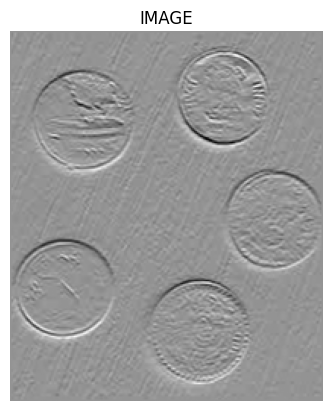

In [250]:
def sobel(img,x,y,k=3):
    maty = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    matx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    
    arr = np.array(img)
    h,w = img.shape
    if (x==1) and (y==0):
        mat = matx
    elif (x==0) and (y==1):
        mat = maty
    else:
        raise ValueError("Invalid x, y parameters. Use x=1, y=0 or x=0, y=1.")
        
    out = np.zeros((h,w),dtype='float64')
    for i in range(1,h-1):
        for j in range(1,w-1):
            out[i][j] = np.sum(mat*arr[i-1:i+2, j-1:j+2])

    return out

show_image(sobel(coin,0,1))

